In [1]:
import pandas as pd
import mysql.connector as connector
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image as image
sns.set()

In [3]:
connection = connector.connect(host="localhost", port="3306", user="root",
                                      password="1234", database="mmt")

In [ ]:
Menu:
1. EER Diagram
2. View
3. Store procedures
4. Index
5. Trigger
6. Materialized View

In [ ]:
1. EER Diagram:

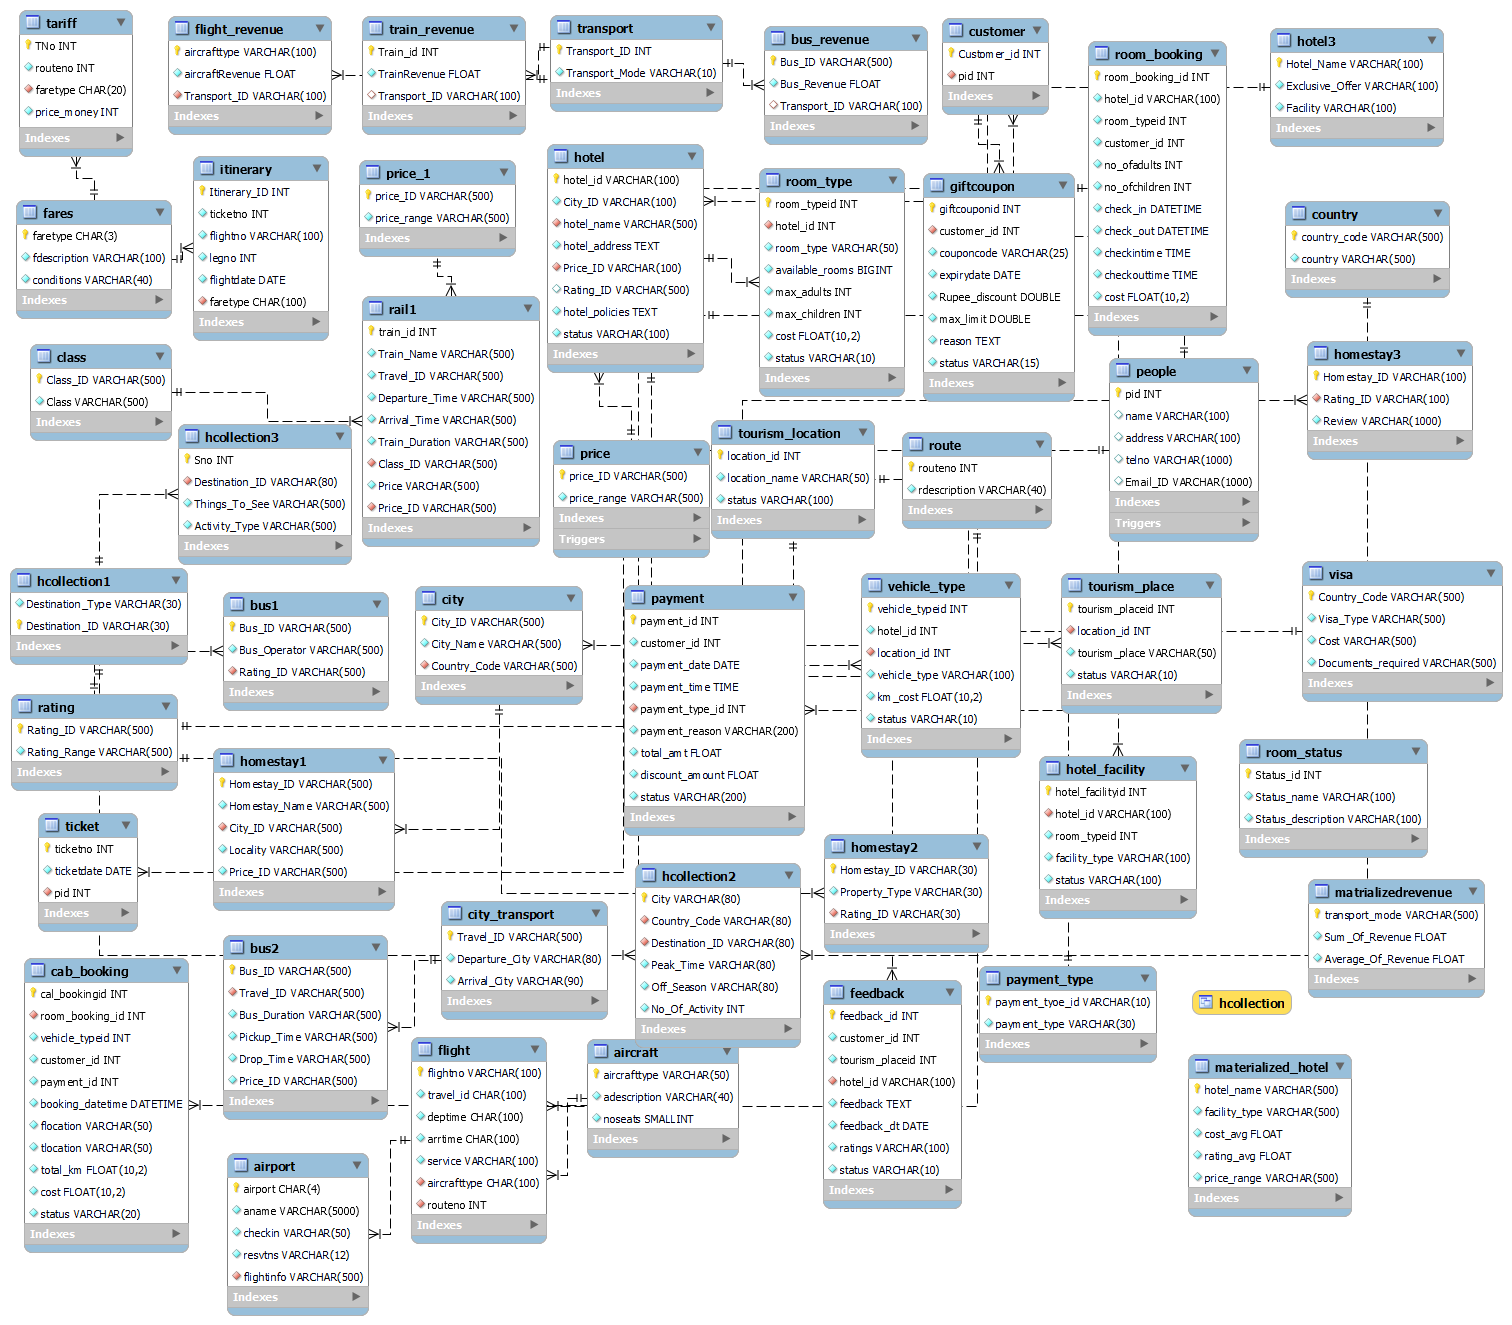

In [ ]:
2. To see created view please gve command to bellow cell:

In [5]:
cur = connection.cursor(buffered=True)
while True :
    viewtype = input("Welcome to view World!\n Choose from following :\na) hcollection\nb) For Transport Revenue\nc) For Hotel . Press X to exit :")
    if viewtype == 'a':
        cur.execute("select * from hcollection where country_code!='Co_Code19'")
        myresult = cur.fetchall()
        print(tabulate(myresult, headers=['Destination Type','Country Code','Pick Type','No. of Activity','Things to see'], tablefmt='psql'))
    elif viewtype == 'b':
        cur.execute("select * from matrializedrevenue")
        myresult = cur.fetchall()
        print(tabulate(myresult, headers=['Transport Mode', 'Sum Of Revenue(in Billion)','Average Of Revenue(in Billion)'], tablefmt='psql'))
    elif viewtype == 'c':
        cur.execute("select * from materialized_hotel")
        myresult = cur.fetchall()
        print(tabulate(myresult, headers=['Hotel Name','Facility Type','Average cost','Average Rating','Prize Range'],tablefmt='psql'))
    elif viewtype == 'X' or viewtype=="x" :
        break

Welcome to view World!
 Choose from following :
a) hcollection
b) For Transport Revenue
c) For Hotel . Press X to exit :a
+--------------------+----------------+-------------+-------------------+--------------------------------------------------+
| Destination Type   | Country Code   | Pick Type   |   No. of Activity | Things to see                                    |
|--------------------+----------------+-------------+-------------------+--------------------------------------------------|
| Beach              | Co_Code6       | NOV-FEB     |                 3 | Agauda Fort                                      |
| Beach              | Co_Code6       | NOV-FEB     |                 3 | Baga Beach                                       |
| Beach              | Co_Code6       | NOV-FEB     |                 3 | Calangute Beach                                  |
| Hill station       | Co_Code6       | MAR_JUN     |                 3 | Shop @Kasol Market                               |
| H

KeyboardInterrupt: Interrupted by user

In [ ]:
3. In the MMT dataset we have created 3 Store procedures:
        1. GetCustomer
        2. MainData
        3. ProfitAndLoss

a. GetCustomer : with this procedure, you will be able to find customer details by using ID
    
CREATE DEFINER=`root`@`localhost` PROCEDURE `getcustomer`(id varchar(5)) BEGIN select * from people where pid=id;END

Please find Example below:

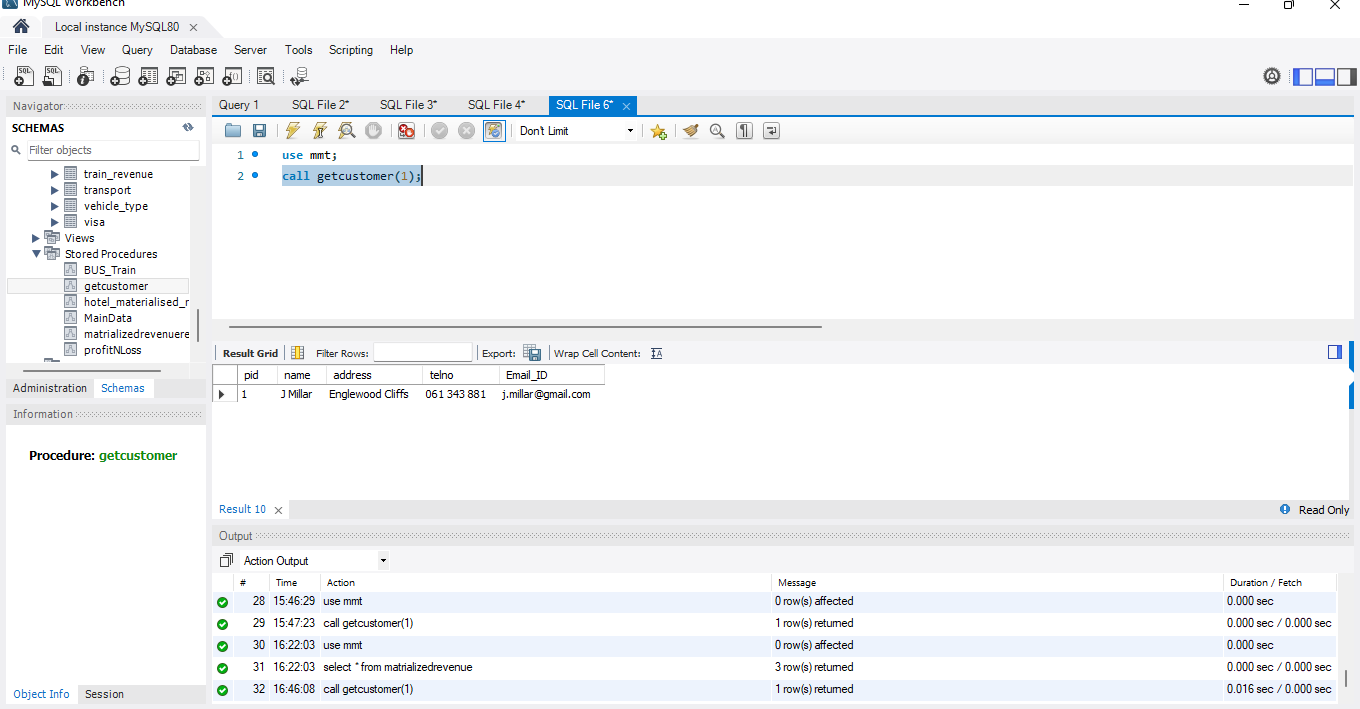

In [ ]:
b. MainData : you will recieve 2 outputs out of this. 
                        a) Customer details.
                        b) Customers Flights booking Detail.
Please find Example below:

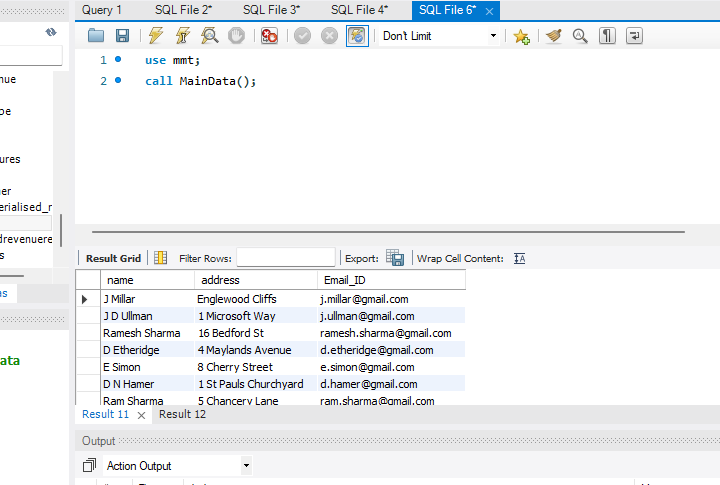

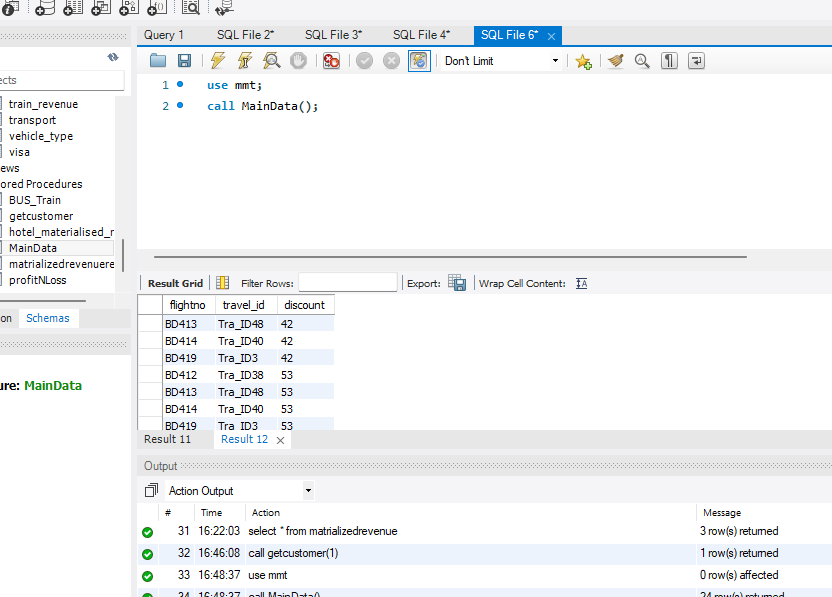

In [ ]:
c. ProfitAndLoss: you will see added service charge nd disounted amount:
Please find Example below:

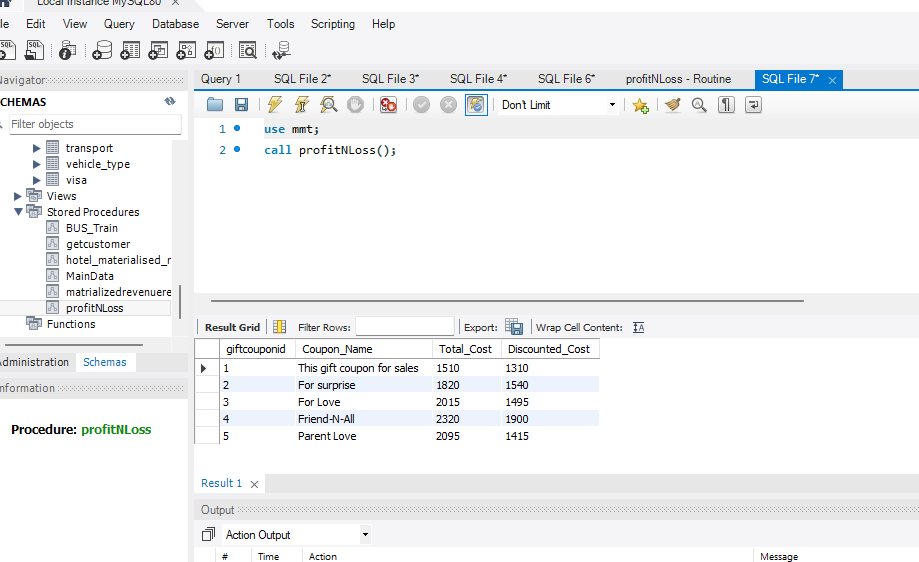

In [ ]:
4. Index
    a)Room Booking
    b)Flight
    c)Tourism Places
    d)City

In [ ]:
a)Room Booking: use mmt; CREATE INDEX indx_roomBooking ON room_booking ( room_booking_id,hotel_id,room_typeid,customer_id,no_ofchildren,checkintime,checkouttime,cost);

In [9]:
cur.execute("SELECT room_booking_id,hotel_id,check_in,check_out,cost FROM room_booking")
myresult=cur.fetchall()

print(tabulate(myresult, headers=['Room Booking ID','Hotel ID','Check in Date','Check Out Date','Cost'], tablefmt='psql'))

+-------------------+------------+---------------------+---------------------+--------+
|   Room Booking ID | Hotel ID   | Check in Date       | Check Out Date      |   Cost |
|-------------------+------------+---------------------+---------------------+--------|
|                 1 | Hotel_1    | 2022-02-25 00:00:00 | 2022-02-27 00:00:00 |   1999 |
|                 2 | Hotel_11   | 2022-02-25 00:00:00 | 2022-02-25 00:00:00 |   7000 |
|                 3 | Hotel_6    | 2022-02-25 00:00:00 | 2022-02-25 00:00:00 |   1008 |
|                 4 | Hotel_12   | 2022-02-25 00:00:00 | 2022-02-25 00:00:00 |   2099 |
|                 5 | Hotel_13   | 2022-03-01 00:00:00 | 2022-03-02 00:00:00 |   1008 |
|                 6 | Hotel_1    | 2022-03-03 00:00:00 | 2022-03-04 00:00:00 |   5999 |
|                 7 | Hotel_5    | 2022-03-03 00:00:00 | 2022-03-03 00:00:00 |   3999 |
|                 8 | Hotel_1    | 2022-03-03 00:00:00 | 2022-03-03 00:00:00 |   4999 |
|                 9 | Hotel_17  

In [ ]:
b)Flight: use mmt;CREATE INDEX indx_flight ON flight(flightno,travel_id,deptime,arrtime,service,aircrafttype,routeno);

In [10]:
cur.execute("SELECT * FROM flight")
myresult=cur.fetchall()

print(tabulate(myresult, headers=['Flight No.','Travell ID','DepTime','ArrTime','Service','AircraftType','RoutNo'], tablefmt='psql'))

+--------------+--------------+-----------+-----------+------------+----------------+----------+
| Flight No.   | Travell ID   | DepTime   | ArrTime   | Service    | AircraftType   |   RoutNo |
|--------------+--------------+-----------+-----------+------------+----------------+----------|
| BD221        | Tra_ID25     | 06:45     | 07:25     | Breakfast  | ATP            |       15 |
| BD222        | Tra_ID43     | 07:55     | 08:45     | Coffee     | ATP            |       15 |
| BD223        | Tra_ID30     | 12:35     | 13:25     | Coffee     | ATP            |       15 |
| BD224        | Tra_ID6      | 11:00     | 11:50     | Coffee     | ATP            |       15 |
| BD225        | Tra_ID33     | 12:35     | 13:25     | Coffee     | ATP            |       15 |
| BD226        | Tra_ID9      | 14:15     | 15;05     | Coffee     | ATP            |       15 |
| BD227        | Tra_ID41     | 15:35     | 16:25     | Coffee     | ATP            |       15 |
| BD228        | Tra_ID11     

In [ ]:
c)Tourism Places:use mmt;CREATE INDEX indx_tourism_place ON tourism_place(tourism_placeid,location_id,tourism_place,status);

In [11]:
cur.execute("SELECT * FROM tourism_place")
myresult=cur.fetchall()

print(tabulate(myresult, headers=['Tourism Place Id','Location ID','Tourism Place','Status'], tablefmt='psql'))



+--------------------+---------------+----------------------------------+----------+
|   Tourism Place Id |   Location ID | Tourism Place                    | Status   |
|--------------------+---------------+----------------------------------+----------|
|                  1 |             3 | Mysore palace                    | Active   |
|                  2 |             2 | Bangalore Palace                 | Active   |
|                  3 |             2 | Lalbagh Botanical Garden         | Active   |
|                  4 |             2 | Cubbon Park                      | Active   |
|                  5 |             2 | Tippu sultan Place and Fort      | Active   |
|                  6 |             2 | Bannerghatta Biological Park     | Active   |
|                  7 |             2 | ISKCON Temple Bangalore          | Active   |
|                  8 |             2 | Wonderla Bangalore               | Active   |
|                  9 |             3 | Mysore palace             

In [ ]:
d)City:use mmt;CREATE INDEX indx_cityON city(City_ID);

In [12]:
cur.execute("SELECT * FROM city")
myresult=cur.fetchall()

print(tabulate(myresult, headers=['City Id','City Name','Country Code'], tablefmt='psql'))




+-----------+--------------------+----------------+
| City Id   | City Name          | Country Code   |
|-----------+--------------------+----------------|
| C_ID1     | Abu Dhabi          | Co_Code15      |
| C_ID10    | Chicago            | Co_Code17      |
| C_ID11    | Dehradun           | Co_Code5       |
| C_ID12    | Delhi              | Co_Code5       |
| C_ID13    | Dubai              | Co_Code15      |
| C_ID14    | Goa                | Co_Code5       |
| C_ID15    | Forde              | Co_Code14      |
| C_ID16    | Frankfurt          | Co_Code4       |
| C_ID17    | Guwahati           | Co_Code5       |
| C_ID18    | Hanoi              | Co_Code18      |
| C_ID19    | Herat              | Co_Code1       |
| C_ID2     | Agra               | Co_Code5       |
| C_ID20    | Hervay Bay         | Co_Code2       |
| C_ID21    | Hyderabad          | Co_Code5       |
| C_ID22    | Istanbul           | Co_Code14      |
| C_ID23    | Jabalpur           | Co_Code5       |
| C_ID24    

In [ ]:
5. Trigger:
    a)price_AFTER_INSERT
    b)people_BEFORE_INSERT

In [ ]:
a)price_AFTER_INSERT: CREATE DEFINER=`root`@`localhost` TRIGGER `price_AFTER_INSERT` AFTER INSERT ON `price` FOR EACH ROW 
                        BEGIN INSERT INTO price_1 VALUES
                        (new.price_ID, new.price_range);
                        END

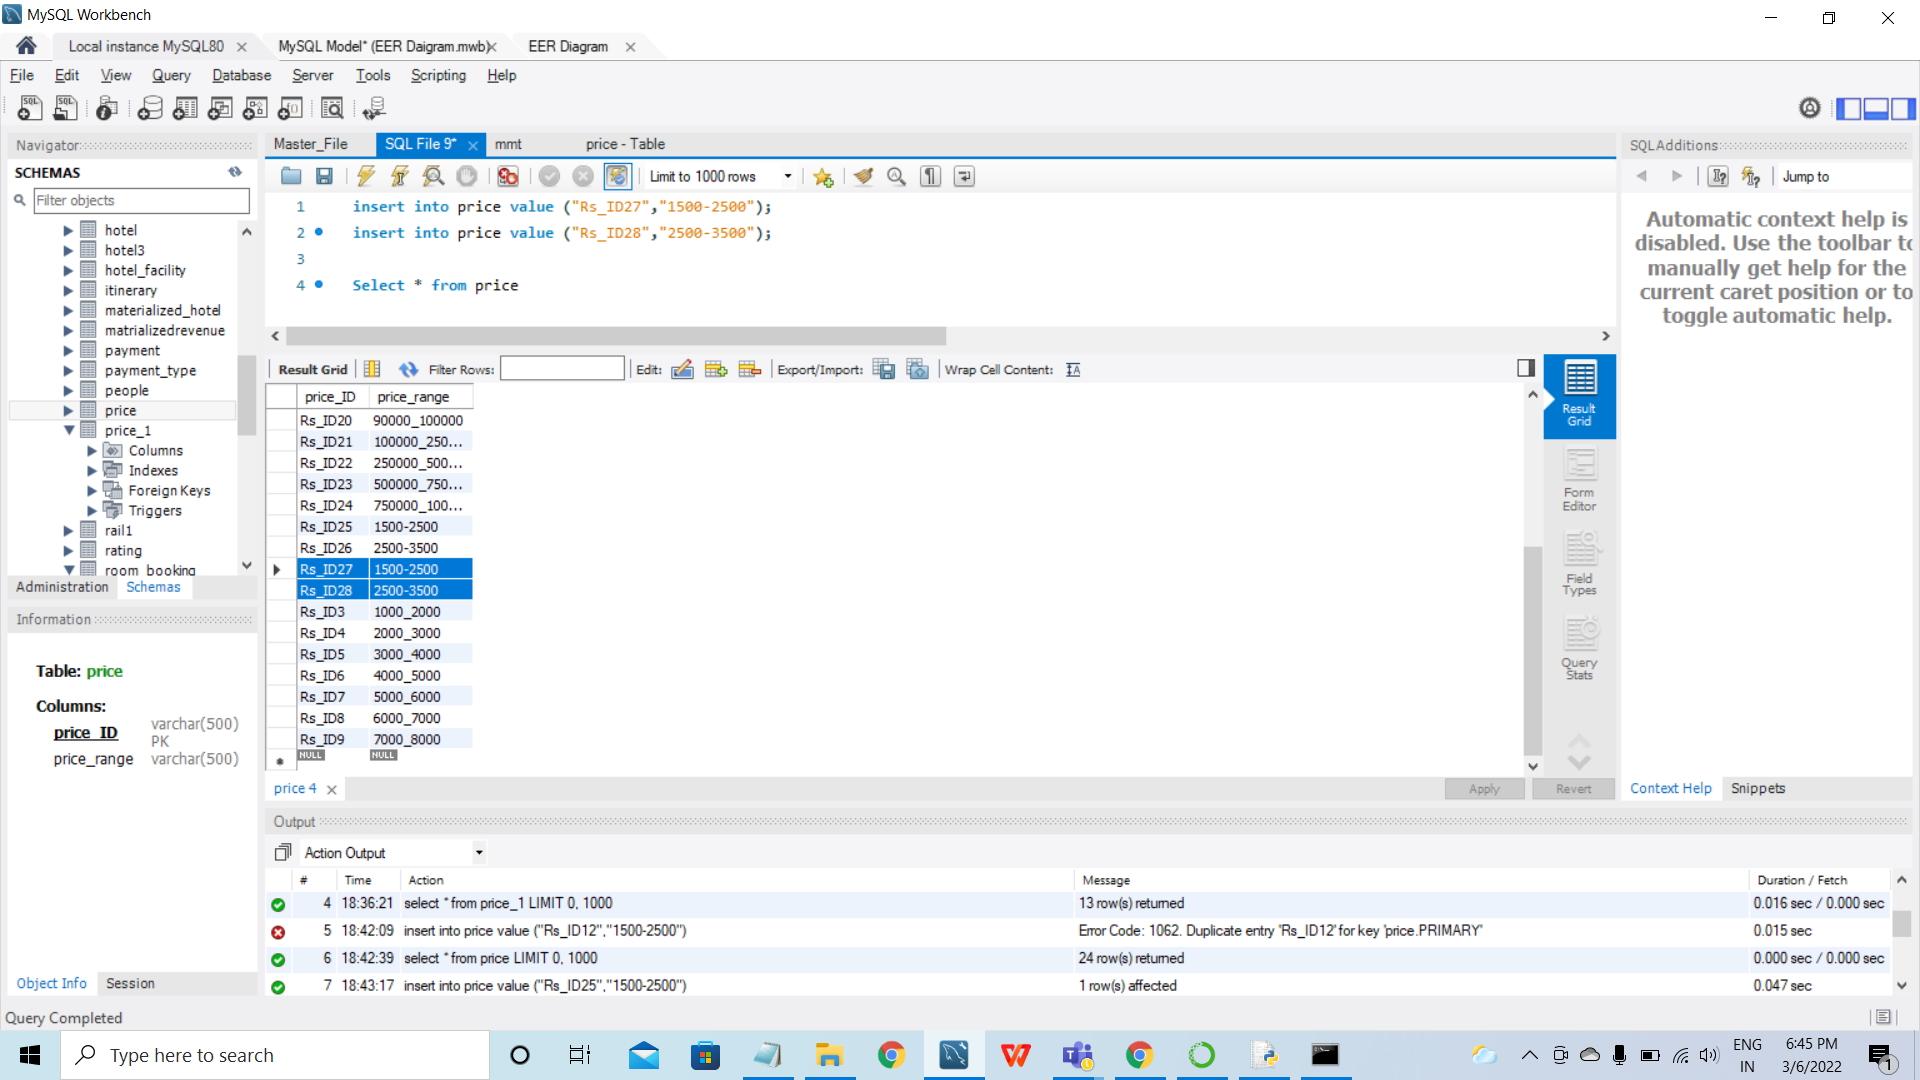

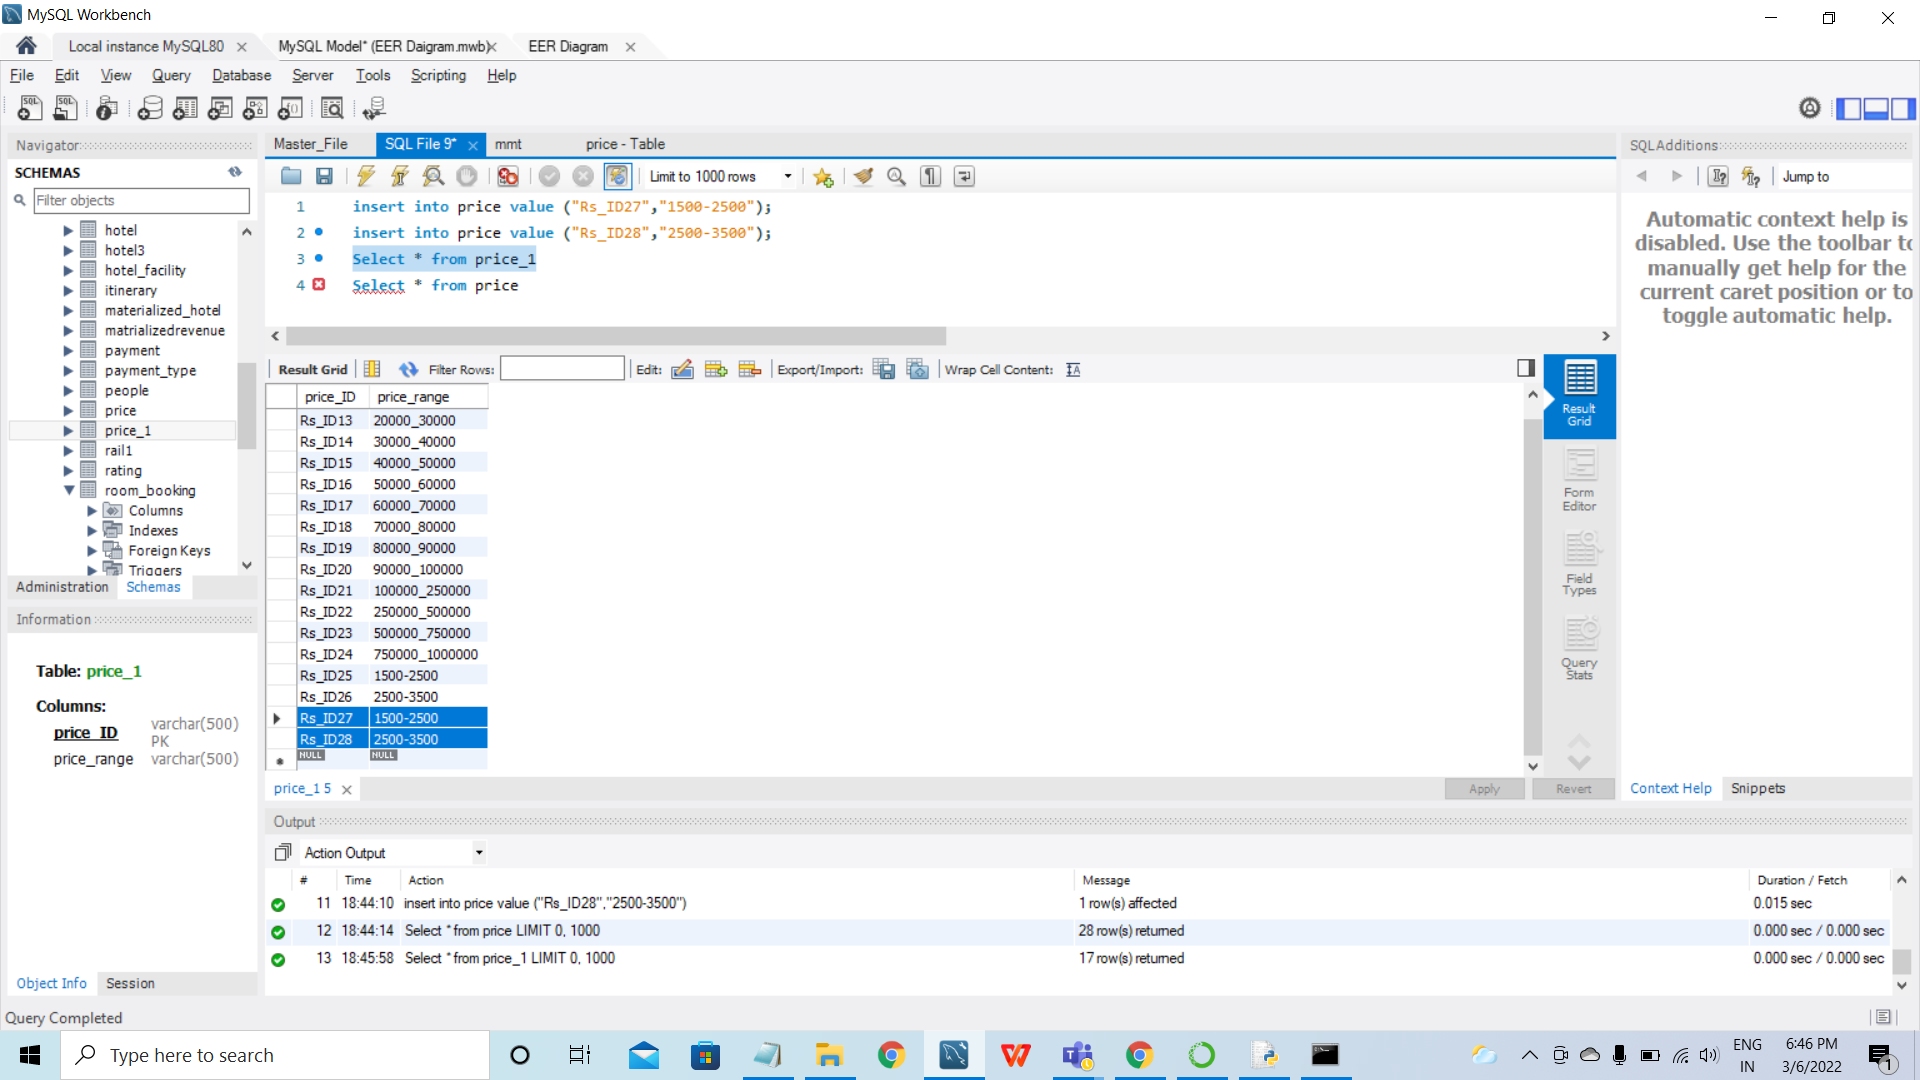

In [ ]:
I wound request you to run below cell to insert new price to the table:
    You will see "1 details inserted" as result.

In [16]:
cur = connection.cursor(buffered=True)

sql = "INSERT INTO price (price_ID, price_range) VALUES (%s, %s)"
val = ("Rs_ID32", "6500-7500")
  
cur.execute(sql, val)
connection.commit()
  
print(cur.rowcount, "details inserted")

1 details inserted


In [ ]:
b)people_BEFORE_INSERT: whever you put blank space in telephone number it will be back with 'Null' valuew.
    
                        CREATE DEFINER=`root`@`localhost` TRIGGER `people_BEFORE_INSERT` BEFORE INSERT ON `people` FOR EACH ROW 
                        BEGIN
                        if new.telno = " " then set new.telno = Null;
                        END

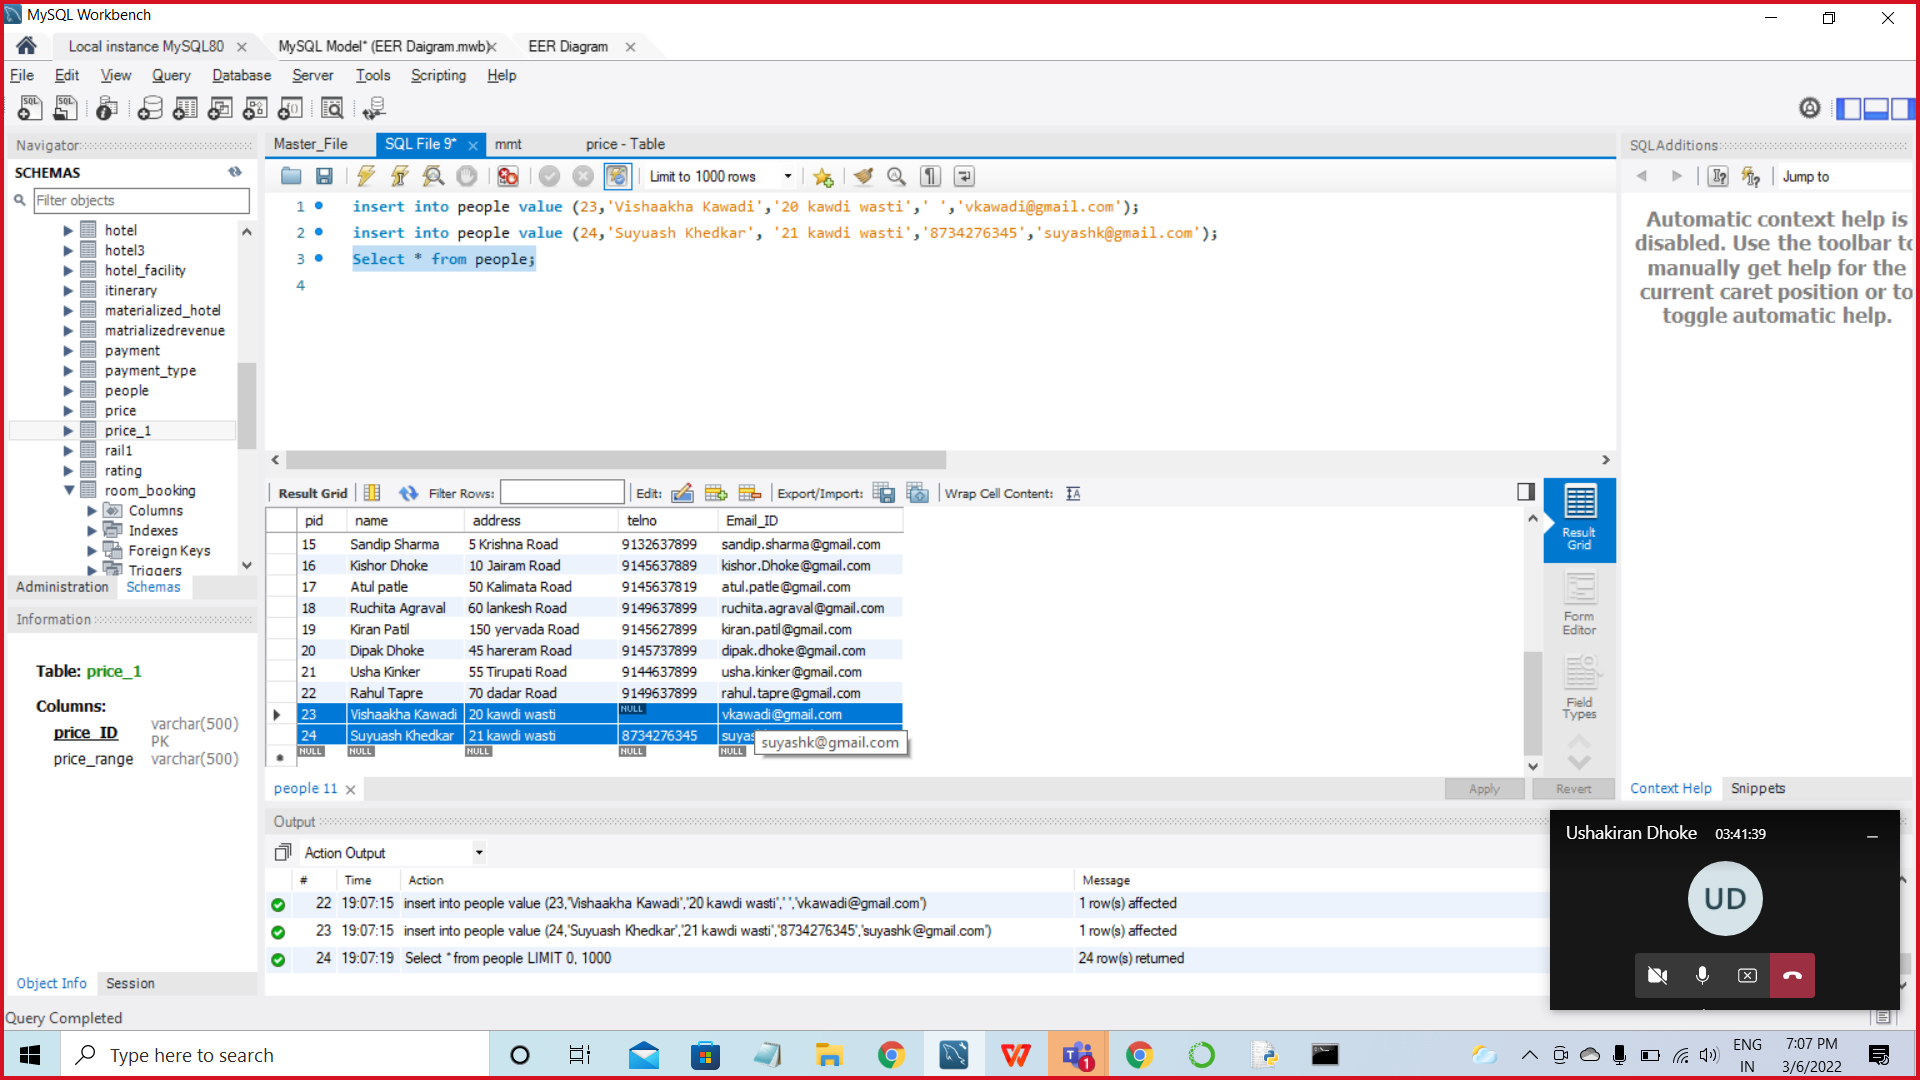

In [ ]:
I wound request you to run below cell to insert new price to the table:
You will see "1 details inserted" as result.

In [15]:
cur = connection.cursor(buffered=True)

sql = "INSERT INTO people (pid,name,address,telno,Email_ID) VALUES (%s, %s,%s,%s,%s)"
val = (26, "Ajay Devgan", "23 Sea Link"," ", 'attamajhisatakli@gmil.com')
  
cur.execute(sql, val)
connection.commit()
  
print(cur.rowcount, "details inserted")

IntegrityError: 1062 (23000): Duplicate entry '25' for key 'people.PRIMARY'

In [ ]:
6. Materialized View: We have created Materialiced view on:
                           a)Traansport Revenue
                           b)Hotel Facility and Rating
                
a)Traansport Revenue: 
                    drop table matrializedrevenue;
                    CREATE TABLE matrializedrevenue
                    (transport_mode VARCHAR(500) NOT NULL,
                    Sum_Of_Revenue FLOAT NOT NULL,
                    Average_Of_Revenue FLOAT NOT NULL);
                    INSERT INTO matrializedrevenue
                    (SELECT transport.transport_mode,
                    sum(flight_revenue.aircraftRevenue) as Sum_Of_Revenue,
                    AVG(flight_revenue.aircraftRevenue) as Average_Of_Revenue
                    FROM transport inner join flight_revenue
                    on transport.transport_id=flight_revenue.transport_id )
                    union
                    (SELECT transport.transport_mode,
                    sum(bus_revenue.Bus_Revenue) as Bus_sum,
                    AVG(bus_revenue.Bus_Revenue) as Bus_avg
                    FROM bus_revenue inner join transport
                    on bus_revenue.transport_id=transport.transport_id )
                    union
                    (SELECT transport.transport_mode,
                    sum(train_revenue.TrainRevenue) as Train_sum,
                    AVG(train_revenue.TrainRevenue) as Train_avg
                    FROM train_revenue inner join transport
                    on train_revenue.transport_id=transport.transport_id )
                    
b)Hotel Facility and Rating:
                    drop table materialized_hotel;
                    CREATE TABLE materialized_hotel
                    (hotel_name VARCHAR(500) NOT NULL,
                    facility_type VARCHAR(500) NOT NULL,
                    cost_avg FLOAT NOT NULL,
                    rating_avg FLOAT NOT NULL
                    , price_range VARCHAR(500) NOT NULL
                    , UNIQUE INDEX hotel (hotel_name));
                    INSERT INTO materialized_hotel
                    SELECT hotel.hotel_name as Hotel_Name
                    , hotel_facility.facility_type as Hotel_Facility
                    , AVG(room_booking.cost) As Cost, AVG(rating.Rating_Range)as Rating, price.price_range as Price
                    FROM hotel
                    join price
                    on hotel.Price_ID = price.price_ID
                    join rating
                    on hotel.Rating_ID = rating.Rating_ID
                    join hotel_facility
                    on hotel.hotel_id = hotel_facility.hotel_id
                    join room_booking
                    on hotel.hotel_id = room_booking.hotel_id
                    group by Hotel_Name

    

In [ ]:
7.Stored procedure to refresh materialized view:
    a)Traansport Revenue: 
            DELIMITER $$
            CREATE PROCEDURE matrializedrevenuerefresh ()
            BEGIN
            TRUNCATE TABLE matrializedrevenue;
            INSERT INTO matrializedrevenue
            (SELECT transport.transport_mode,
            sum(flight_revenue.aircraftRevenue) as Sum_Of_Revenue,
            AVG(flight_revenue.aircraftRevenue) as Average_Of_RevenueFROM transport inner join flight_revenue
            on transport.transport_id=flight_revenue.transport_id )
            union
            (SELECT transport.transport_mode, sum(bus_revenue.Bus_Revenue) as Bus_sum,
            AVG(bus_revenue.Bus_Revenue) as Bus_avg
            FROM bus_revenue inner join transport
            on bus_revenue.transport_id=transport.transport_id )
            union
            (SELECT transport.transport_mode, sum(train_revenue.TrainRevenue) as Train_sum,
            AVG(train_revenue.TrainRevenue) as Train_avg
            FROM train_revenue inner join transport
            on train_revenue.transport_id=transport.transport_id
            );
            END;
    b)Hotel Facility and Rating:  
            CREATE DEFINER=`root`@`localhost` PROCEDURE `hotel_materialised_refresh`()
            BEGIN
            TRUNCATE TABLE materialized_hotel;
            INSERT INTO materialized_hotel
            SELECT hotel.hotel_name as Hotel_Name
            , hotel_facility.facility_type as Hotel_Facility
            , AVG(room_booking.cost) As Cost, AVG(rating.Rating_Range)as Rating, price.price_range as Price
            FROM hotel
            join price
            on hotel.Price_ID = price.price_ID
            join rating
            on hotel.Rating_ID = rating.Rating_ID
            join hotel_facility
            on hotel.hotel_id = hotel_facility.hotel_id
            join room_booking
            on hotel.hotel_id = room_booking.hotel_id
            group by Hotel_Name;
            END
    